In [2]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    x_train, x_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = x_train[[id_name, target]]
    x_train = x_train.drop(columns=[target])

    
    y_test = x_test[[id_name, target]]
    x_test = x_test.drop(columns=[target])
    return x_train, x_test, y_train, y_test 
    
df = pd.read_csv("diabetes.csv")
x_train, x_test, y_train, y_test = exam_data_load(df, target='Outcome')

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [6]:
x_train.describe()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,386.978827,3.845277,120.705212,68.530945,20.982085,82.229642,31.948534,0.477471,33.319218
std,219.881344,3.388952,32.047977,19.761915,15.965031,116.525772,7.734385,0.339811,11.940953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,196.500000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244250,24.000000
50%,388.000000,3.000000,117.000000,72.000000,23.000000,44.000000,32.250000,0.377000,29.000000
75%,575.750000,6.000000,140.000000,80.000000,33.000000,130.000000,36.600000,0.628500,41.000000
max,766.000000,17.000000,199.000000,114.000000,99.000000,846.000000,59.400000,2.420000,81.000000


In [8]:
x_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30


> 다 연속형임 -> pairplot 및 boxplot

## EDA


In [9]:
x_train.duplicated().sum()

0

In [10]:
x_test.duplicated().sum()

0

### 일단 x랑 y합치기


In [13]:
x_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30


In [12]:
y_train.head()

,id,Outcome
147,147,0
344,344,0
390,390,0
150,150,0
132,132,1


In [14]:
train = x_train.copy()
train['Outcome'] = y_train['Outcome']
train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
147,147,2,106,64,35,119,30.5,1.400,34,0
344,344,8,95,72,0,0,36.8,0.485,57,0
390,390,1,100,66,29,196,32.0,0.444,42,0
150,150,1,136,74,50,204,37.4,0.399,24,0
132,132,3,170,64,37,225,34.5,0.356,30,1


In [15]:
train.corr()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
id,1.000000,-0.022639,0.001313,0.030152,0.034351,0.015921,0.027716,-0.018934,0.009647,-0.048599
Pregnancies,-0.022639,1.000000,0.157231,0.151080,-0.086042,-0.079270,0.020483,-0.040809,0.530117,0.232571
Glucose,0.001313,0.157231,1.000000,0.160031,0.058158,0.313152,0.243888,0.145261,0.265131,0.458378
BloodPressure,0.030152,0.151080,0.160031,1.000000,0.233607,0.115477,0.284482,0.049321,0.234298,0.048623
SkinThickness,0.034351,-0.086042,0.058158,0.233607,1.000000,0.431224,0.406174,0.182880,-0.137826,0.075839
Insulin,0.015921,-0.079270,0.313152,0.115477,0.431224,1.000000,0.214843,0.189927,-0.064915,0.128257
BMI,0.027716,0.020483,0.243888,0.284482,0.406174,0.214843,1.000000,0.141877,0.061852,0.296715
DiabetesPedigreeFunction,-0.018934,-0.040809,0.145261,0.049321,0.182880,0.189927,0.141877,1.000000,0.041031,0.174323
Age,0.009647,0.530117,0.265131,0.234298,-0.137826,-0.064915,0.061852,0.041031,1.000000,0.218914
Outcome,-0.048599,0.232571,0.458378,0.048623,0.075839,0.128257,0.296715,0.174323,0.218914,1.000000


> BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction
> 흠 근데 분류는 corr안봐도 될거같기도 ;; 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False




<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

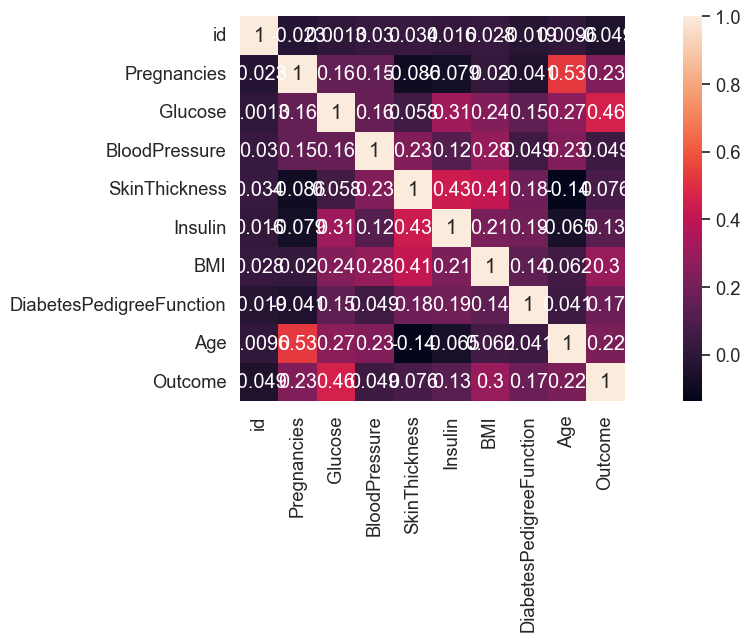

In [20]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.2)
sns.heatmap(data=train.corr(),square=True,annot=True,cbar=True)
plt.show()

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


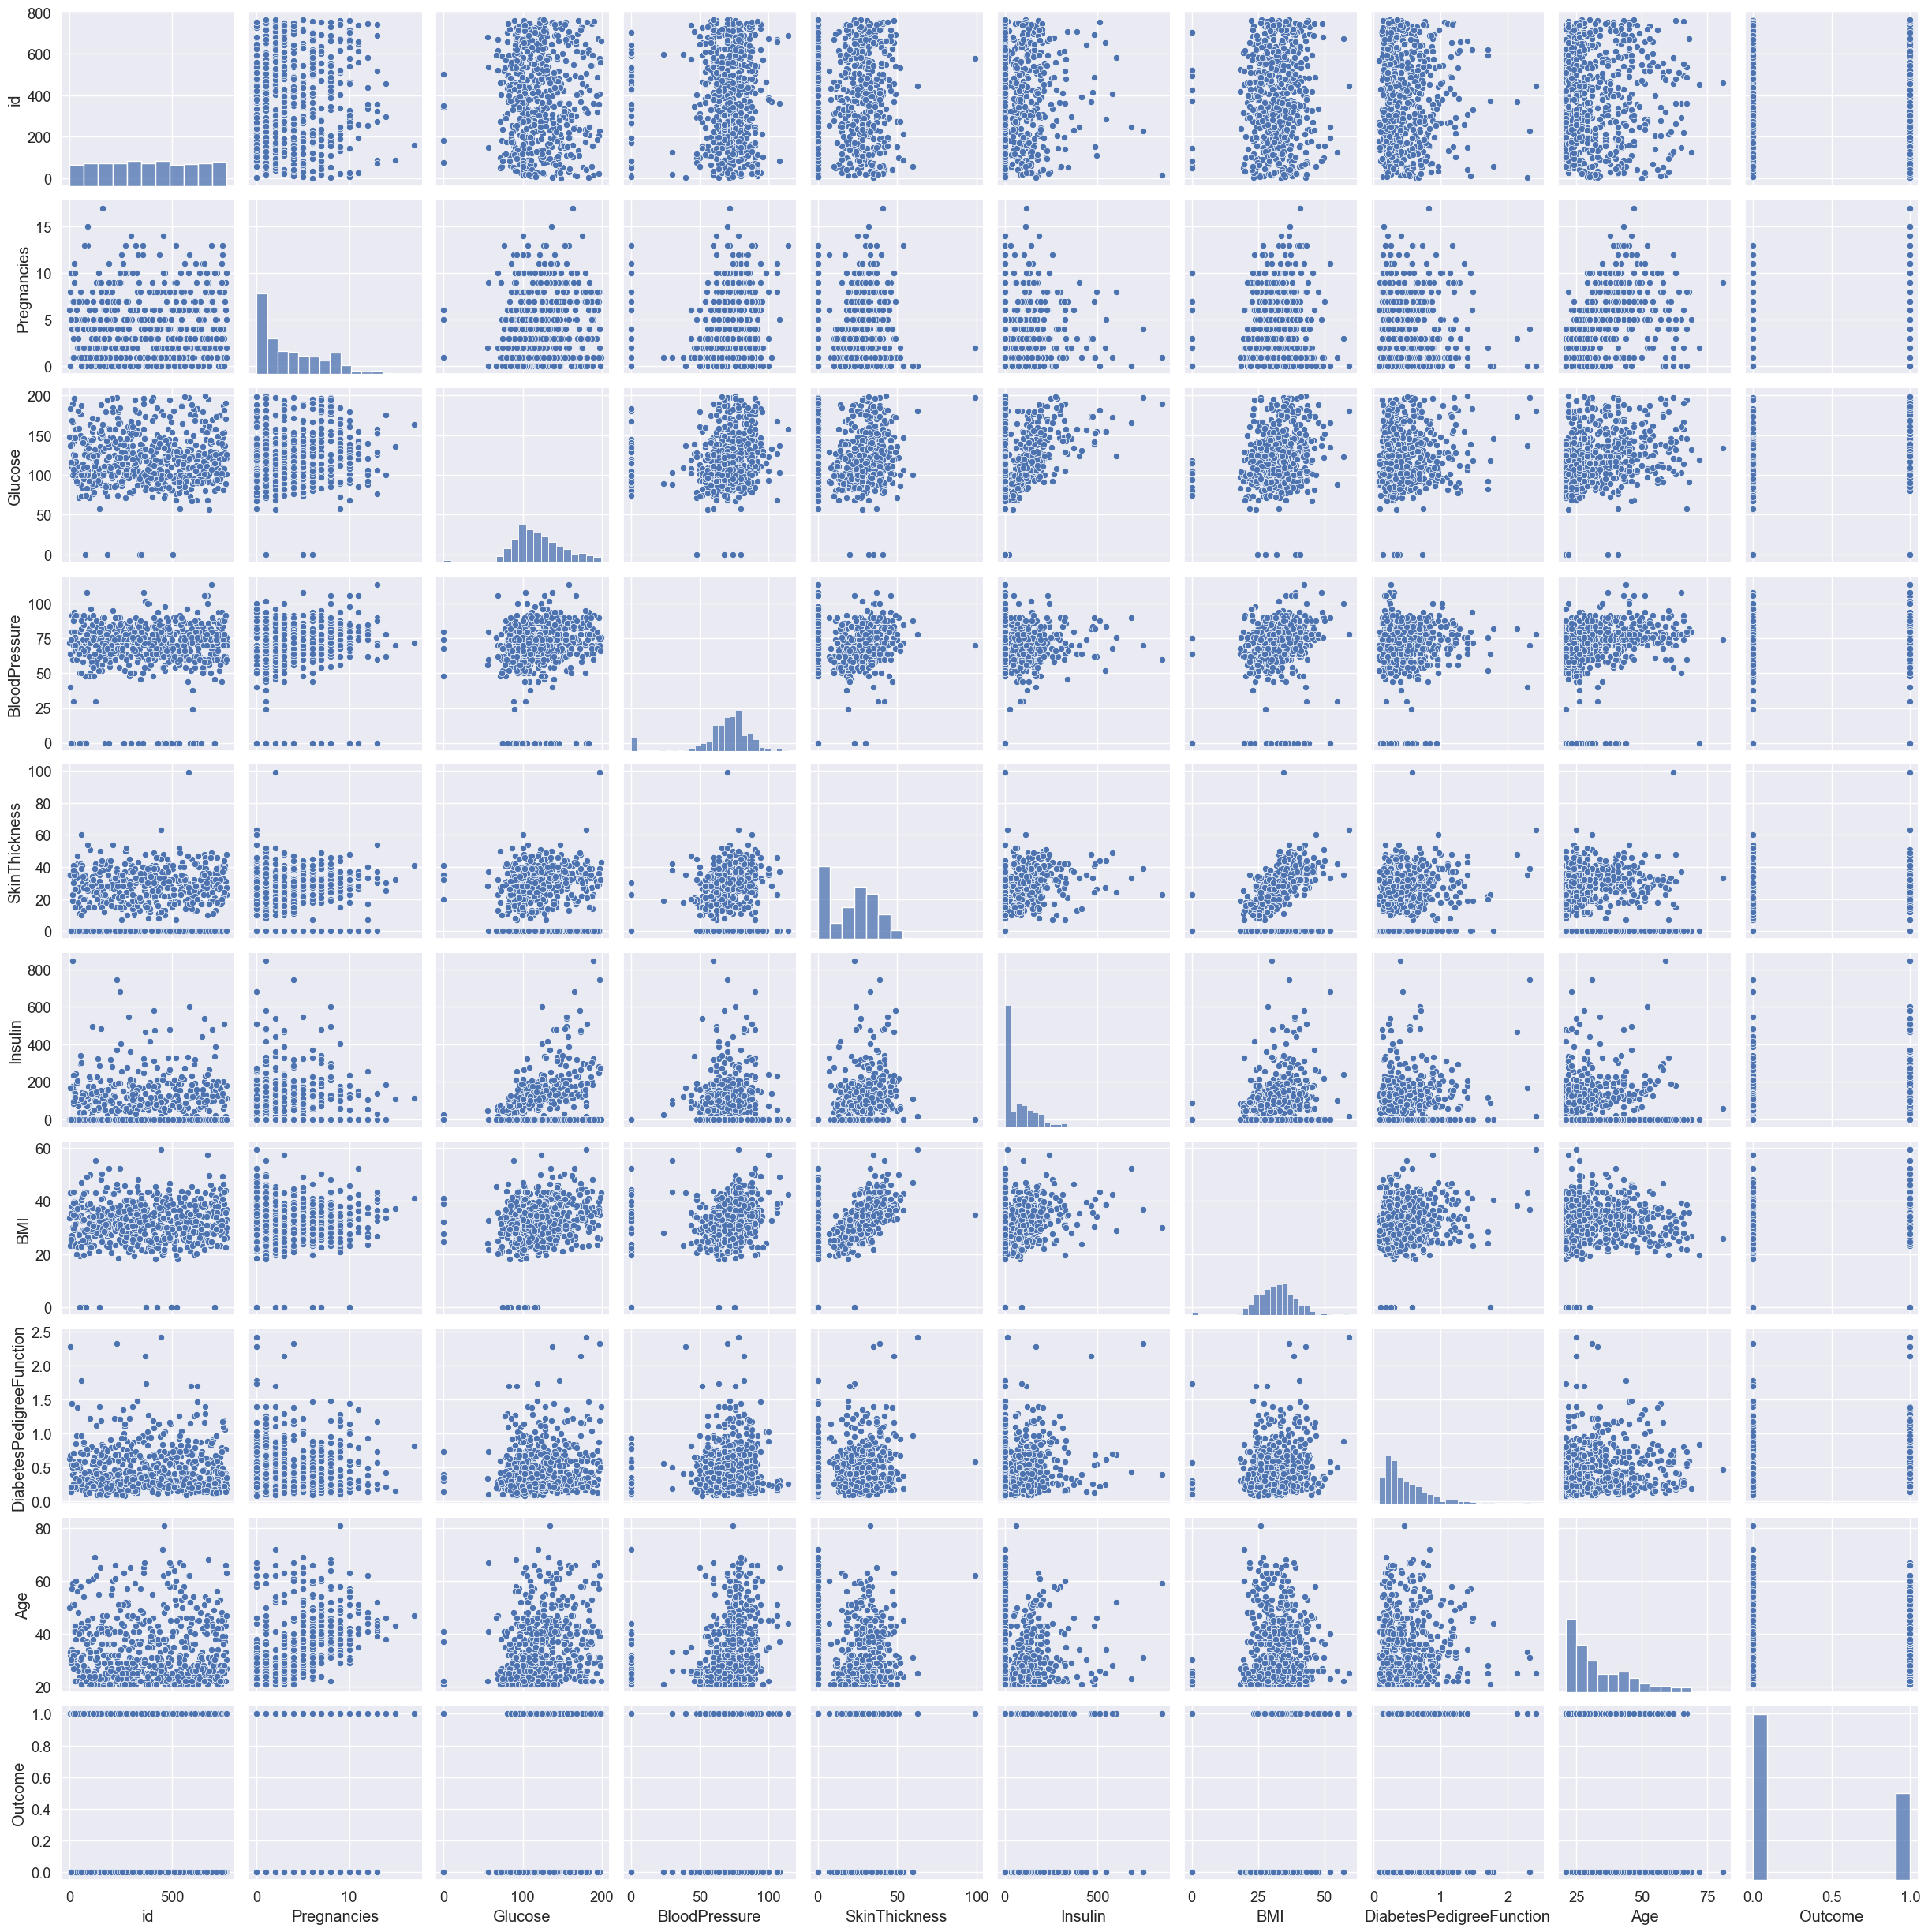

In [21]:
sns.pairplot(data=train)

In [22]:
x_train.columns

Index(['id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

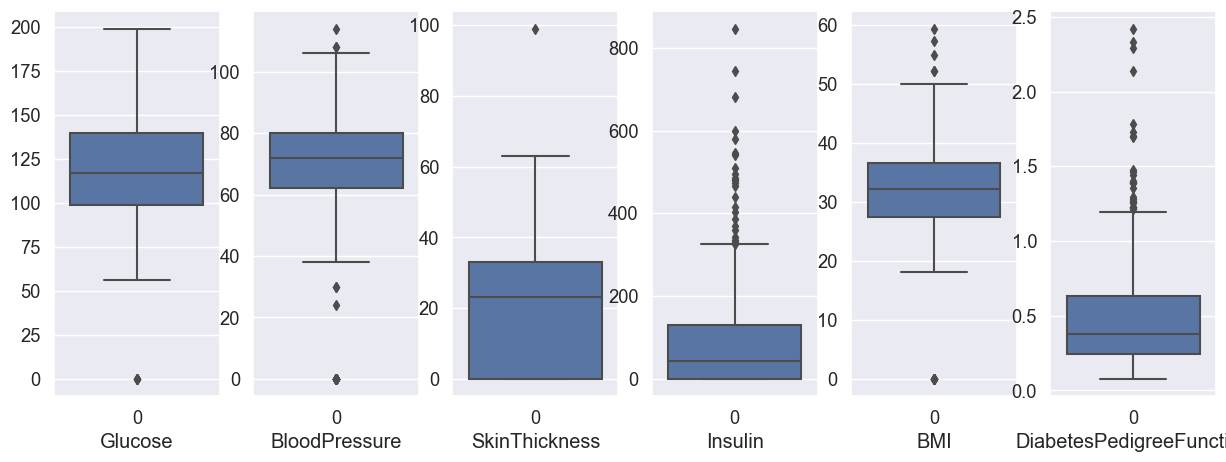

In [37]:
fig,ax = plt.subplots(1,len(x_train.iloc[:,2:-1].columns),figsize=(15,5))
for i,v in enumerate(x_train.iloc[:,2:-1].columns):
    sns.boxplot(x_train.loc[:,v],ax=ax[i])
    ax[i].set_xlabel(v)

<Axes: >

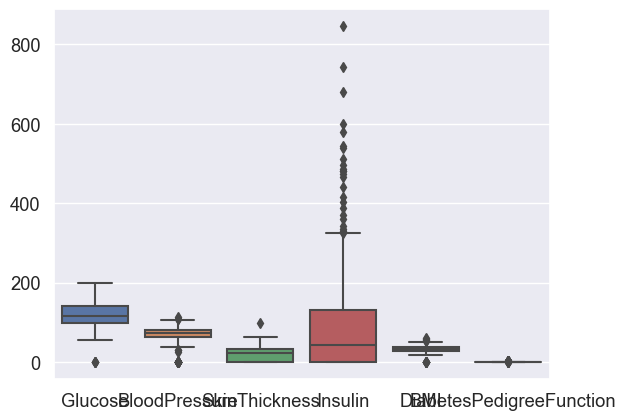

In [23]:
sns.boxplot(x_train.iloc[:,2:-1])

> 정규화 필요 + 이상치 제거 ㄱㄱ 

> 나이랑 임신횟수는 막대그래프로 해보자 

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

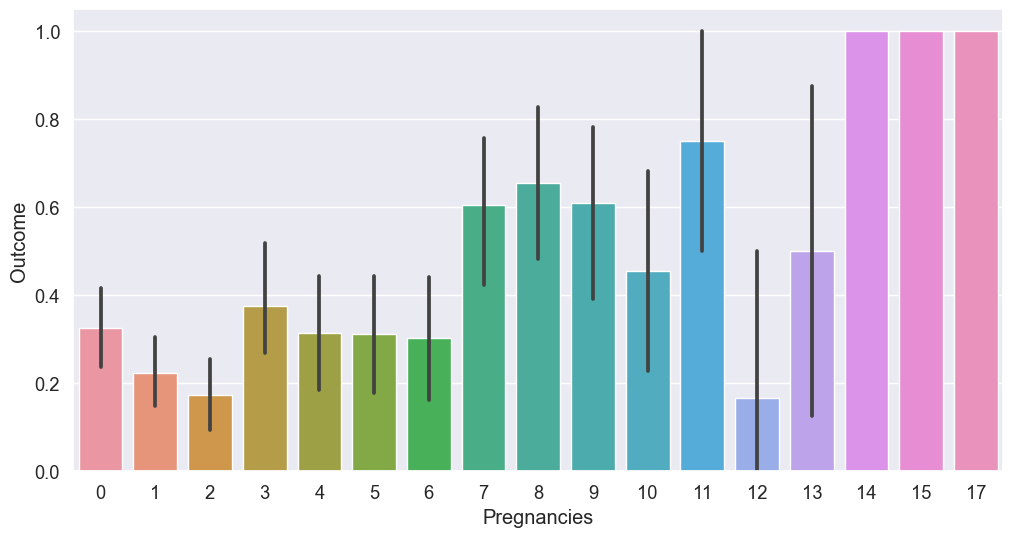

In [39]:
## 임신횟수
plt.figure(figsize=(12,6))

sns.barplot(x=train['Pregnancies'],y=train['Outcome'],data=train)

>> 임신횟수가 늘어날때마다 1일 비율이 높은 것을 확ㅇ니

<Axes: xlabel='Age', ylabel='Outcome'>

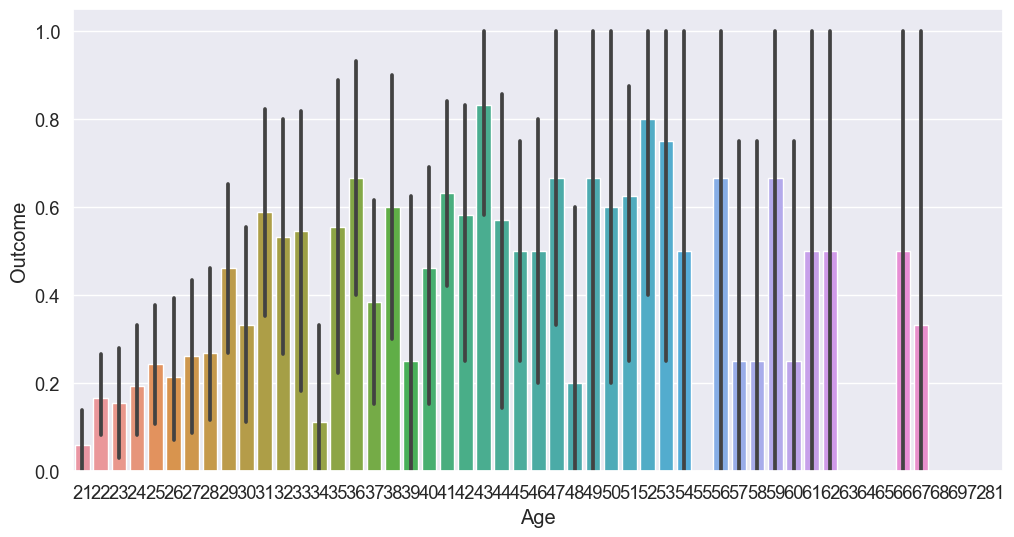

In [44]:
## 나이
plt.figure(figsize=(12,6))
sns.barplot(x=train['Age'],y=train['Outcome'],data=train)

## 데이터 전처리
### 정리
> corr 은 분류라서 안봐도 됨

> 이상치 제거 필요

> 결측치 없음

> scaling 필요

### 이상치 제거 

In [48]:
### 필요없는 열 제거
x_train = x_train.drop('id',axis=1)
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,2,106,64,35,119,30.5,1.400,34
344,8,95,72,0,0,36.8,0.485,57
390,1,100,66,29,196,32.0,0.444,42
150,1,136,74,50,204,37.4,0.399,24
132,3,170,64,37,225,34.5,0.356,30


In [45]:
x_train.columns


Index(['id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [47]:
preg_1q = x_train['Pregnancies'].quantile(0.25)
preg_3q = x_train['Pregnancies'].quantile(0.75)
IQR_preg = preg_3q - preg_1q

x_train = x_train.loc[(x_train['Pregnancies']>=preg_1q - 1.5 * IQR_preg)& (x_train['Pregnancies']<=preg_1q + 1.5 * IQR_preg)]

In [ ]:
for col in x_train.columns :
    Q1 = x_train